# Fashion MNIST Classification
## Part 1 - Multi Class Classification of the dataset
Created by:
- Beatriz Correia Paulino 
- Luís Pereira
- João Fragoso 

In [1]:
# Necessary imports
import tensorflow as tf
from tensorflow.keras import layers
import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import random

Definitions
- The height and width of each image is 28 pixels.
- There are 10 differente classes in the Fashion MNIST dataset: T-Shirt/Top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Boot.
- The callback BEST_MODEL_CHECKPOINT saves the model's weights to a file ("tmp/best_model_binary.weights.h5") whenever the validation loss decreases. This ensures that you keep the best model encountered during training
- The EARLY_STOPPING callback stops the training process if the validation loss does not improve for a specified number of epochs (patience)

In [2]:
# constants - dimensions
IMG_HEIGHT = 28
IMG_WIDTH = 28

# labels/classes
LABELS = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
N_CLASSES = 10

# callbacks
BEST_MODEL_CHECKPOINT = tf.keras.callbacks.ModelCheckpoint(
    filepath="tmp/best_model_binary.weights.h5",    #The path where the model weights will be saved.   
    save_weights_only=True,   #Only the model weights are saved, not the entire model architecture.
    monitor='val_loss',   #The validation loss is monitored to determine if the model has improved.
    mode='min',   #The callback looks for the minimum value of the monitored metric
    save_best_only=True)    #Only the best model weights (with the lowest validation loss) will be saved.

EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   #The validation loss is monitored.
    patience=5)   #Training will stop if the validation loss does not improve for 5 consecutive epochs.

In [3]:
# load dataset and split into train and test
dataset = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

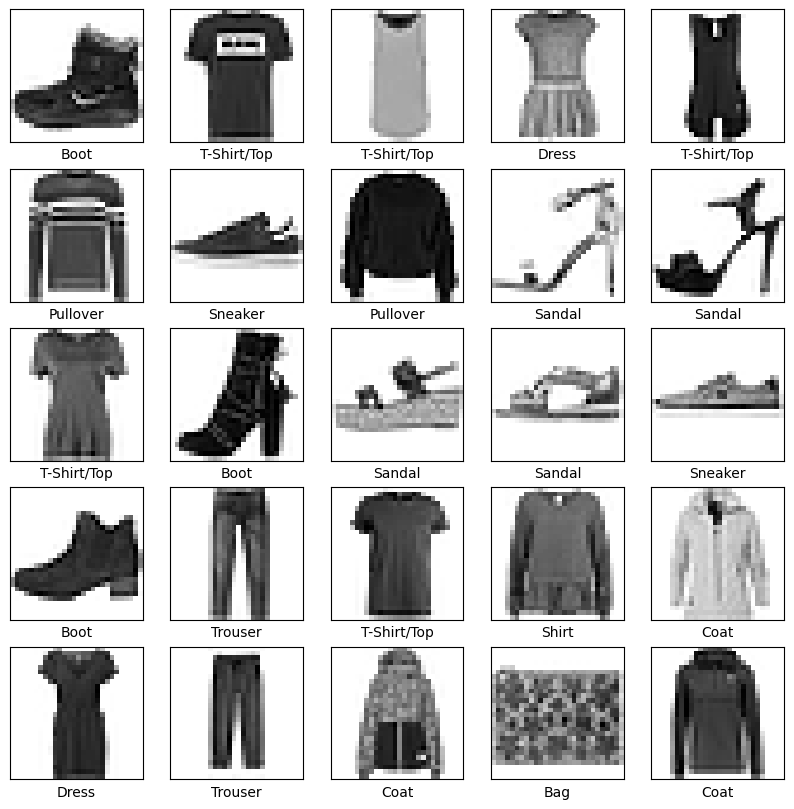

In [4]:
# visualize first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(LABELS[y_train[i]])
plt.show()

- The first 50,000 images and labels (x_train[:50000] and y_train[:50000]) are kept for training.
- The remaining 10,000 images and labels (x_train[50000:] and y_train[50000:]) are used for validation.

In [5]:
# validation set 
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

Normalizing the image data by scaling the pixel values to the range [0, 1]. This is done by dividing by 255.0, which is the maximum value for a pixel in grayscale images.

In [6]:
# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

- Converting the labels from integer vectors to binary class matrices using one-hot encoding. 
- This is suitable for training a multiclass classification network. 
- The to_categorical function transforms each class label into a vector of length equal to the number of classes (N_CLASSES), with a 1 in the index of the class and 0s elsewhere.

In [7]:
# transform vector of labels into matrix - suitable for multiclass network but not binary
y_train = tf.keras.utils.to_categorical(y_train,N_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test,N_CLASSES)
y_val = tf.keras.utils.to_categorical(y_val,N_CLASSES)

In [8]:
# Shape of train and test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0].shape)

(50000, 28, 28)
(50000, 10)
(10000, 28, 28)
(10000, 10)
(28, 28)


## Model and Compiler

In [9]:
# Set Seed for Reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Create the model
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)), # input layer (flatten for convolutions)
    layers.Dense(32, activation='relu'), # hidden layer (relu for convolutions)
    layers.Dense(32, activation='relu'), # hidden layer (relu for convolutions)
    layers.Dense(N_CLASSES, activation='softmax') # output layer (softmax for multiclass)
    ])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), # adam optimizer (better for convolutions)
        loss='categorical_crossentropy', # categorical crossentropy loss function (better for multiclass)
        metrics=['accuracy']) # accuracy metric (better for multiclass) 

# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[BEST_MODEL_CHECKPOINT, EARLY_STOPPING])

# Calculating the accuracy on the test set and val set for all models and keeping the best one
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=2)

print(f"Test accuracy: {test_accuracy}")
print(f"Val accuracy: {val_accuracy}")


Epoch 1/50


1563/1563 [==============================] - 4s 2ms/step - loss: 0.5616 - accuracy: 0.8021 - val_loss: 0.4556 - val_accuracy: 0.8435
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4174 - accuracy: 0.8521 - val_loss: 0.4184 - val_accuracy: 0.8505
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3811 - accuracy: 0.8615 - val_loss: 0.4056 - val_accuracy: 0.8574
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3580 - accuracy: 0.8700 - val_loss: 0.3683 - val_accuracy: 0.8676
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3406 - accuracy: 0.8747 - val_loss: 0.3631 - val_accuracy: 0.8685
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3256 - accuracy: 0.8819 - val_loss: 0.3629 - val_accuracy: 0.8680
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3154 - accuracy: 0.8830 - val_loss: 0.3659 - val_accura

## Model Evaluation

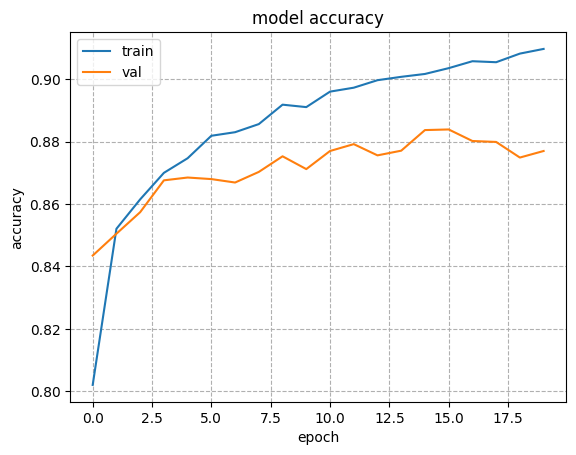

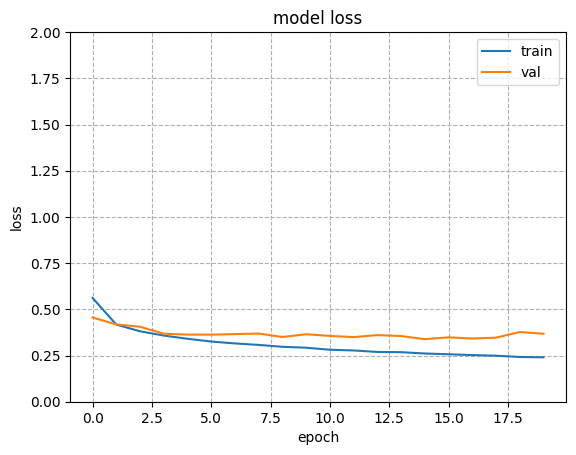

In [10]:
# Evaluate the model - loss and accuracy during training

# accuracy
plt.figure(num=1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper left")
plt.grid(True, ls='--')


# loss
plt.figure(num=2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylim(0, 2.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper right")
plt.grid(True, ls='--')

In [11]:
# Get the validation accuracy of the best model
val_accuracy = history.history['val_accuracy'][-1]
val_accuracy 

0.8769999742507935

In [12]:
# Accuracy on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 0s 1ms/step - loss: 0.3936 - accuracy: 0.8684
Test accuracy: 0.868399977684021


In [13]:
# Confusion matrix values 

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 1ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


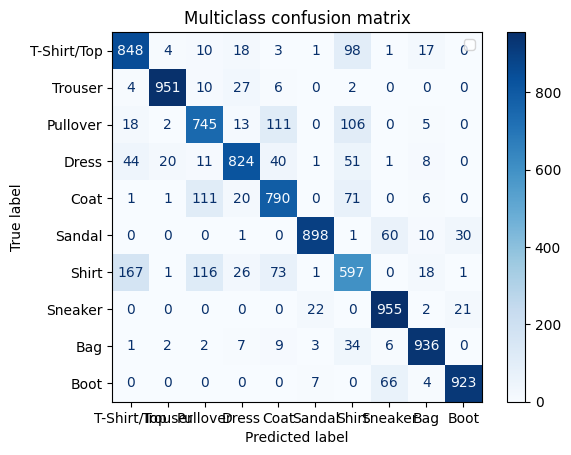

In [20]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LABELS)
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Multiclass confusion matrix")
plt.legend()
plt.show()

#### The multiclass classification network most frequently confuses the following classes:
- Shirt with T-Shirt - 167
- Shirt with Pullover - 116
- Pullover with Coat and vice versa - 111

### Test binary classification "Clothing" / "Footwear and bags" using the multiclass classification network followed by binarization of the predictions.

Building and applying a mapping function to map the 10 original classes of the dataset into only 2 classes (positive and negative)

In [14]:
def map_to_binary(labels):
    # Positive class (1): labels 0, 1, 2, 3, 4, 6
    # Negative class (0): the rest (5, 7, 8, 9)
    binary_labels = np.where((labels <= 4) | (labels == 6), 1, 0)
    return binary_labels

# Apply the mapping function to the datasets
y_pred_binary = map_to_binary(y_pred)
y_test_binary = map_to_binary(y_test)

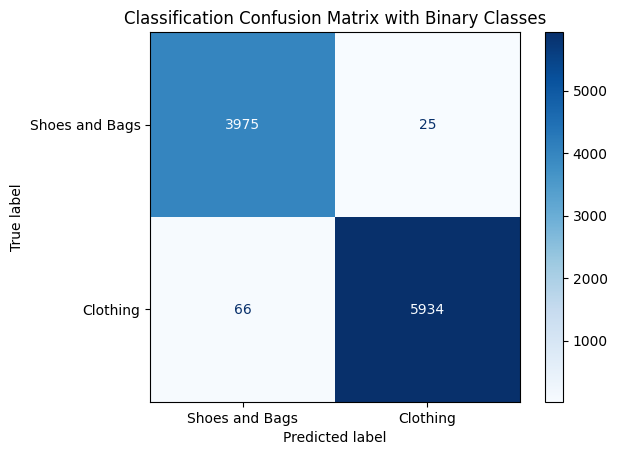

In [15]:
# displaying the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Shoes and Bags', 'Clothing'])
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Classification Confusion Matrix with Binary Classes")
plt.show()